## Григорьев Дмитрий, вариант 3.
### Импортируем необходимые модули 
### + наш модуль.

In [1]:
from mft2 import PolLagrange, bisection
import matplotlib.pyplot as plt             #Для построения графиков
from scipy.optimize import root_scalar      #Для поиска корня
from pandas import DataFrame                #Для построения таблиц


# Начальные данные.
### Функция $f(x)=\sqrt[4]{x+2}, \\ y_0 = 1.6$
### В общем случае, конечно, будет дана таблица x,f(x).

In [2]:
f = lambda x: pow(x+2,1./4)
nodes = [0, 2, 4, 5, 7, 10] #Можно задать узлы, а можно и отрезок задать. 
a, b = min(nodes), max(nodes)
val = 1.6
values = [f(nodes[i]) for i in range(len(nodes))] #В табличном случае -- список значений

## Интерполируем по Лагранжу.
## Тут же начинаем поиск корня.

In [3]:
polynom = PolLagrange(nodes, values)
ans, iterations = bisection(polynom, val, a, b, 10**(-7))

## Графики для наглядности и сводная таблица

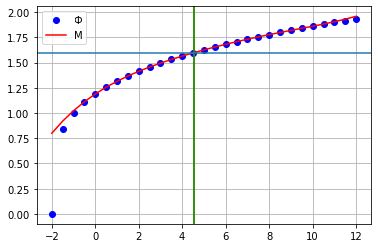

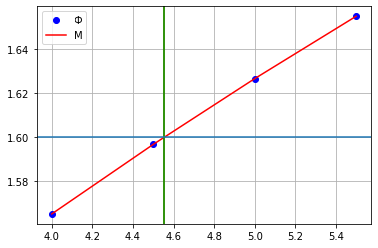

,
"Ответ, полученный нами",4.554068
"Ответ, полученный через модуль scipy",4.553600
Фактическая погрешность,0.000468
Потребовавшееся число итераций в методе Ньютона,4.000000


In [4]:
real_root = (root_scalar(lambda x: f(x)-1.6, method = 'bisect', bracket=[3, 5])).root
a, b = (8, 12)
plot0 = plt.plot([x*1./2 for x in range(-4, 25)],[f(x*1./2) for x in range(-4, 25)],'bo',
                [x*1./2 for x in range(-4, 25)],[polynom.get_value(x*1./2) for x in range(-4, 25)],'r')
plt.grid()
plt.axvline(ans, 0, 1, color = 'y')
plt.axvline(real_root, 0, 2, color = 'g')
plt.axhline(val, 0, 1)
plt.legend("ФМ")
plt.show()

plot = plt.plot([x*1./2 for x in range(a, b)],[f(x*1./2) for x in range(a, b)],'bo',
                [x*1./2 for x in range(a, b)],[polynom.get_value(x*1./2) for x in range(a, b)],'r')
plt.grid()
plt.axvline(ans, 0, 1, color = 'y')
plt.axvline(real_root, 0, 2, color = 'g')
plt.axhline(val, 0, 1)
plt.legend("ФМ")
plt.show()

dataframe = DataFrame([ans, real_root, ans-real_root, int(iterations)],
                      index = ["Ответ, полученный нами",
                               "Ответ, полученный через модуль scipy",
                               "Фактическая погрешность",
                               "Потребовавшееся число итераций в методе Ньютона"],
                      columns = [" "])

dataframe